In [271]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [272]:
# 各パス指定

In [273]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [274]:
# 分類数設定

In [275]:
NUM_CLASSES = 10

In [276]:
# 学習データ読み込み

In [277]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [278]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [280]:
# モデル構築

In [281]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [282]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 42)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                860       
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [283]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [284]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [285]:
# モデル訓練

In [286]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
55/61 [==========================>...] - ETA: 0s - loss: 2.3045 - accuracy: 0.1278
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
61/61 [==============================] - 1s 8ms/step - loss: 2.2917 - accuracy: 0.1307 - val_loss: 2.0619 - val_accuracy: 0.1572
Epoch 2/1000
41/61 [===================>..........] - ETA: 0s - loss: 2.0511 - accuracy: 0.2214

/home/masooma/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/61 [========================>.....] - ETA: 0s - loss: 2.0302 - accuracy: 0.2314
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
61/61 [==============================] - 0s 6ms/step - loss: 2.0137 - accuracy: 0.2405 - val_loss: 1.7759 - val_accuracy: 0.5557
Epoch 3/1000
45/61 [=====================>........] - ETA: 0s - loss: 1.8068 - accuracy: 0.3352
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
61/61 [==============================] - 0s 5ms/step - loss: 1.7818 - accuracy: 0.3433 - val_loss: 1.4910 - val_accuracy: 0.6686
Epoch 4/1000
42/61 [===================>..........] - ETA: 0s - loss: 1.6024 - accuracy: 0.4023
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
61/61 [==============================] - 0s 5ms/step - loss: 1.5779 - accuracy: 0.4125 - val_loss: 1.2380 - val_accuracy: 0.7939
Epoch 5/1000
57/61 [===========================>..] - ETA: 0s - loss: 1.4109 - accuracy: 0.4894
Epoch 5: savin

In [287]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9988


In [288]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [289]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[9.0257628e-11 1.4362596e-10 9.3274805e-20 4.4831079e-23 1.6140332e-09
 2.1330648e-06 4.5561701e-02 9.5443612e-01 3.2233968e-10 1.5633987e-21]
7


In [290]:
# 混同行列

81/81 [==============================] - 0s 2ms/step


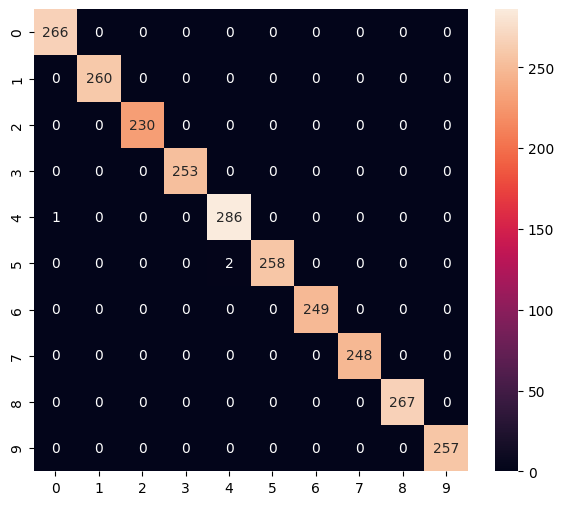

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00       253
           4       0.99      1.00      0.99       287
           5       1.00      0.99      1.00       260
           6       1.00      1.00      1.00       249
           7       1.00      1.00      1.00       248
           8       1.00      1.00      1.00       267
           9       1.00      1.00      1.00       257

    accuracy                           1.00      2577
   macro avg       1.00      1.00      1.00      2577
weighted avg       1.00      1.00      1.00      2577



In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [292]:
# Tensorflow-Lite用のモデルへ変換

In [293]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/home/masooma/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [294]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpj2f7duzu/assets


INFO:tensorflow:Assets written to: /tmp/tmpj2f7duzu/assets
2023-08-30 19:26:26.333975: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-30 19:26:26.334259: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-30 19:26:26.334588: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpj2f7duzu
2023-08-30 19:26:26.336002: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-30 19:26:26.336028: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpj2f7duzu
2023-08-30 19:26:26.342273: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-30 19:26:26.402488: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpj2f7duzu
2023-08-30 19:26:26.425404: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

6876

In [295]:
# 推論テスト

In [296]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [297]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [298]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [299]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 105 µs, sys: 26 µs, total: 131 µs
Wall time: 89.4 µs


In [300]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.0257808e-11 1.4362461e-10 9.3274101e-20 4.4830565e-23 1.6140335e-09
 2.1330648e-06 4.5561623e-02 9.5443624e-01 3.2233910e-10 1.5633930e-21]
7
